### The Library I used are:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

### Task 1

The work to be performed was to load the EirGrid system demand data that was provided 
into my computer and to plot and carefully label the time series of energy demand during 2014 by taking into consideration the null values that was in the spreadsheet

In [2]:
# Loading the csv file into my working environment
system_demand=pd.read_csv('EirGridSystemDemand2014.csv')

In [3]:
#checking the dataset structure and values
system_demand.head()

,Date,Time,Demand
0,1/1/2014,0:00,2899.0
1,1/1/2014,0:15,2869.0
2,1/1/2014,0:30,2827.0
3,1/1/2014,0:45,2787.0
4,1/1/2014,1:00,2724.0


#### I. Checking the missing values

In [4]:
system_demand.isnull().sum()

Date      0
Time      0
Demand    5
dtype: int64

#### II. Checking the unique values

In [5]:
system_demand['Time'].unique()

array(['0:00', '0:15', '0:30', '0:45', '1:00', '1:15', '1:30', '1:45',
       '2:00', '2:15', '2:30', '2:45', '3:00', '3:15', '3:30', '3:45',
       '4:00', '4:15', '4:30', '4:45', '5:00', '5:15', '5:30', '5:45',
       '6:00', '6:15', '6:30', '6:45', '7:00', '7:15', '7:30', '7:45',
       '8:00', '8:15', '8:30', '8:45', '9:00', '9:15', '9:30', '9:45',
       '10:00', '10:15', '10:30', '10:45', '11:00', '11:15', '11:30',
       '11:45', '12:00', '12:15', '12:30', '12:45', '13:00', '13:15',
       '13:30', '13:45', '14:00', '14:15', '14:30', '14:45', '15:00',
       '15:15', '15:30', '15:45', '16:00', '16:15', '16:30', '16:45',
       '17:00', '17:15', '17:30', '17:45', '18:00', '18:15', '18:30',
       '18:45', '19:00', '19:15', '19:30', '19:45', '20:00', '20:15',
       '20:30', '20:45', '21:00', '21:15', '21:30', '21:45', '22:00',
       '22:15', '22:30', '22:45', '23:00', '23:15', '23:30', '23:45'],
      dtype=object)

In [6]:
system_demand['Time'].nunique()

96

#### III. Handling the missing values

In [7]:
# Filling the missing values using the linear interpolation method
system_demand=system_demand.interpolate()

In [8]:
# Checking the missing values
system_demand.isnull().sum()

Date      0
Time      0
Demand    0
dtype: int64

In [9]:
system_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    35040 non-null  object 
 1   Time    35040 non-null  object 
 2   Demand  35040 non-null  float64
dtypes: float64(1), object(2)
memory usage: 821.4+ KB


In [10]:
# Converting both the date and the time into a timestamp
system_demand['Date']=pd.to_datetime(system_demand['Date'], dayfirst=False)
system_demand['Time'] = system_demand['Time'].apply(lambda x: datetime.strptime(x,'%H:%M'))
system_demand['Date'] = system_demand.apply(lambda row: row['Date'].replace(hour=row['Time'].hour, minute=row['Time'].minute), axis=1)
system_demand=system_demand[['Date','Demand']]

In [11]:
np.asarray(system_demand)

array([[Timestamp('2014-01-01 00:00:00'), 2899.0],
       [Timestamp('2014-01-01 00:15:00'), 2869.0],
       [Timestamp('2014-01-01 00:30:00'), 2827.0],
       ...,
       [Timestamp('2014-12-31 23:15:00'), 2961.0],
       [Timestamp('2014-12-31 23:30:00'), 2957.0],
       [Timestamp('2014-12-31 23:45:00'), 2948.0]], dtype=object)

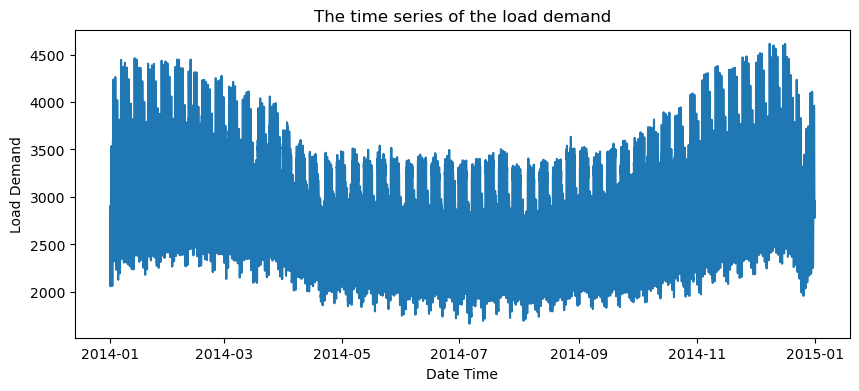

In [12]:
# Plotting the timeserie of the energy demand
plt.figure(figsize=(10,4),dpi=100)
plt.plot(system_demand['Date'],system_demand['Demand']);
plt.xlabel('Date Time');
plt.ylabel('Load Demand');
plt.title('The time series of the load demand');
plt.savefig("Task1(DemandVsTime).png")

### Task 2

The work to be conducted here was to estimate the autocorrelation coefficients for 10 days and plot the autocorrelation against the lag with axis labelled in days as well as to comment on the shape of the plot.

In [13]:
system_demand_df=system_demand

In [14]:
aut_days=np.linspace(1,10,960)

In [15]:
Days=range(0,961, 96)

In [16]:
# Calculaton of the autocorrelation
auto_correlation=system_demand['Demand'].autocorr(lag=10*24*4)
auto_correlation

0.8125294397938725

<Figure size 1000x400 with 0 Axes>

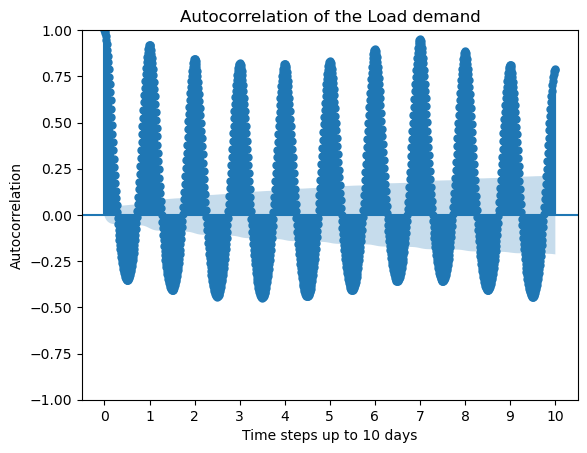

In [17]:
plt.figure(figsize=(10,4))
plot_acf(system_demand['Demand'], lags=10*4*24)
plt.xticks(Days, range(11));
plt.xlabel('Time steps up to 10 days');
plt.ylabel('Autocorrelation');
plt.title('Autocorrelation of the Load demand');
plt.savefig("Task2(Autocorrelation).png")

### Task 3

The task requires you to generate a time of year variable that spans from 0 to 1 and to illustrate how the demand changes throughout the year utilizing a graphic.

In [18]:
len(system_demand['Date'])

35040

In [19]:
time_of_year=np.linspace(0,1,35040)

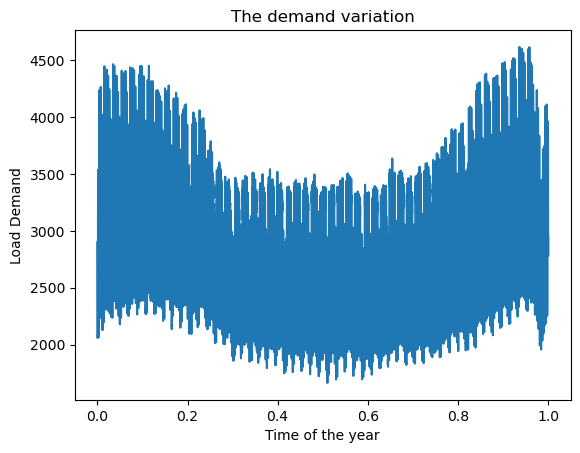

In [20]:
plt.plot(time_of_year,system_demand['Demand']);
plt.xlabel("Time of the year");
plt.ylabel("Load Demand")
plt.title("The demand variation");
plt.savefig("Task3(DemandVsTime).png")

### Task 4

The objective is to calculate the average demand for each of the 12 months of the year and present them in a bar chart with proper labeling.

In [21]:
df=system_demand
df=df.set_index('Date')
df_monthly = df.resample('M').mean()
print("The length of this dataframe a monthly average is",len(df))
df.head()

The length of this dataframe a monthly average is 35040


,Demand
Date,
2014-01-01 00:00:00,2899.0
2014-01-01 00:15:00,2869.0
2014-01-01 00:30:00,2827.0
2014-01-01 00:45:00,2787.0
2014-01-01 01:00:00,2724.0


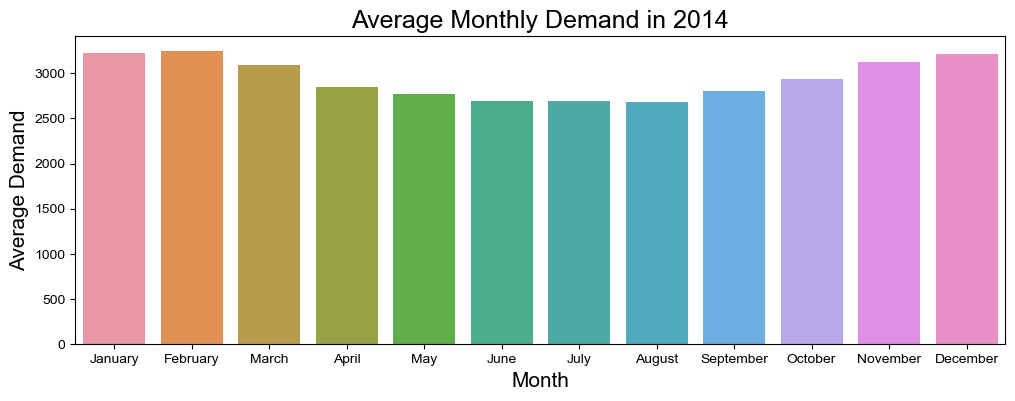

In [22]:
# Resample the demand data by month and calculate the mean demand for each month
df_monthly = df.resample('M').mean()

plt.figure(figsize=(12,4))
sns.barplot(x=df_monthly.index.month_name(),y='Demand', data=df_monthly);
plt.xlabel('Month',fontsize=15);
plt.ylabel('Average Demand',fontsize=15);
plt.title('Average Monthly Demand in 2014',fontsize=18);
sns.set_style('whitegrid')
plt.savefig("Task4(Monthlydemand Profile).png")

### Task 5

The task involves calculating the average demand for each of the 24 hours of the day and illustrating them in a bar chart with the different hours of the day clearly labeled. This chart is commonly known as the daily demand profile.

In [23]:
df_hourly=system_demand
df_hourly=df_hourly.set_index('Date')
df_hourly = df_hourly.resample('H').mean()
print("The length of this dataframe a hourly average is",len(df_hourly))
df_hourly.head()

The length of this dataframe a hourly average is 8760


,Demand
Date,
2014-01-01 00:00:00,2845.50
2014-01-01 01:00:00,2637.50
2014-01-01 02:00:00,2413.50
2014-01-01 03:00:00,2251.75
2014-01-01 04:00:00,2132.50


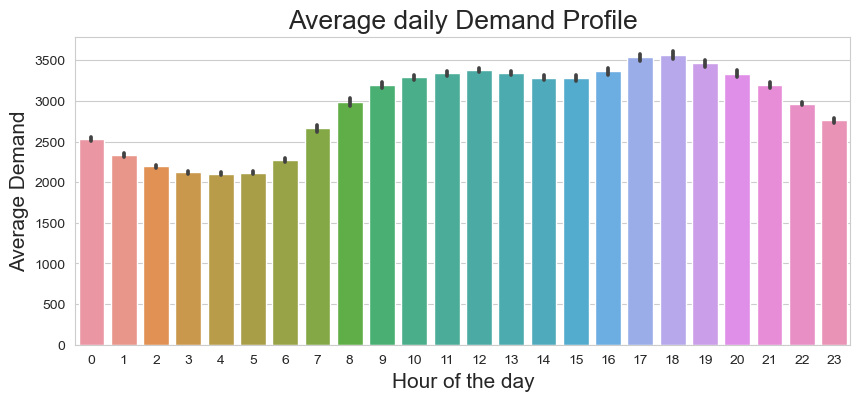

In [24]:
# Plotting the daily average demand
colors = ['#FF5733', '#C70039', '#900C3F', '#581845']

plt.figure(figsize=(10,4));
sns.barplot(x=df_hourly.index.hour, y=df_hourly['Demand']);
plt.xlabel('Hour of the day',fontsize=15);
plt.ylabel('Average Demand',fontsize=15);
plt.title('Average daily Demand Profile',fontsize=19);
sns.set_style('whitegrid');
plt.savefig("Task5(dailydemand Profile).png");

### Task 6

The task requires to compute the average demand for each of the seven days of the week and present them in the form of a bar chart. We are then expected to determine whether the results are reasonable based on your intuition regarding electricity consumption

In [25]:
df_daily=system_demand
df_daily=df_daily.set_index('Date')
daily_demand = df_daily.resample('D').mean()
days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print("The length of this dataframe a daily average is",len(daily_demand))
daily_demand.head()

The length of this dataframe a daily average is 365


,Demand
Date,
2014-01-01,2764.677083
2014-01-02,3127.572917
2014-01-03,3252.531250
2014-01-04,3014.114583
2014-01-05,2914.395833


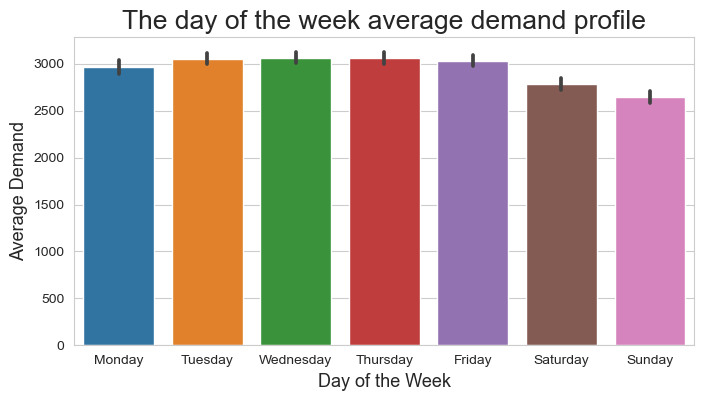

In [26]:
# A bar chart of the daily average demand using Seaborn
plt.figure(figsize=(8,4));
sns.barplot(x=daily_demand.index.day_name(), y=daily_demand['Demand'], order=days);
sns.set_style('whitegrid');
plt.xlabel('Day of the Week',fontsize=13);
plt.ylabel('Average Demand',fontsize=13);
plt.title('The day of the week average demand profile',fontsize=19);
plt.savefig("Task6(Weeklydemand Profile).png");

### Task 7

The task at hand is to create a daily demand profile for each day of the week. To accomplish this, we need to select a specific hour for each day and calculate the average demand during that hour. we are required to display the results in a graph, where each day of the week has a separate profile curve.

In [27]:
df=system_demand
df=df.set_index('Date')

In [28]:
daily_demand = df.resample('H').mean()
daily_demand['days'] = daily_demand.index.day_name()
daily_demand.head(7)

,Demand,days
Date,,
2014-01-01 00:00:00,2845.50,Wednesday
2014-01-01 01:00:00,2637.50,Wednesday
2014-01-01 02:00:00,2413.50,Wednesday
2014-01-01 03:00:00,2251.75,Wednesday
2014-01-01 04:00:00,2132.50,Wednesday
2014-01-01 05:00:00,2078.50,Wednesday
2014-01-01 06:00:00,2088.50,Wednesday


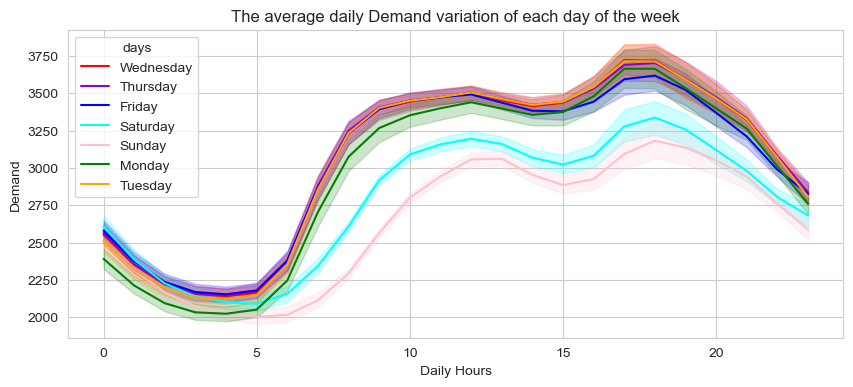

In [29]:
plt.figure(figsize=(10,4))
sns.lineplot(x=daily_demand.index.hour, y='Demand', hue="days", palette=[ '#FF0000', '#9400D3', '#0000FF', '#00FFFF', '#FFC0CB','#008000', '#FFA500'], data=daily_demand, dashes=False)
plt.xlabel("Daily Hours")
plt.title("The average daily Demand variation of each day of the week")
plt.savefig("Task7(Weekly Profile).png")

In [30]:
days_demand=system_demand_df
days_demand=days_demand.set_index("Date")
days_demand['days']=days_demand.index.day_name()
days_demand=days_demand.reset_index()

In [31]:
monday_demand = days_demand[days_demand['days'].isin(['Monday'])]
tuesday_demand = days_demand[days_demand['days'].isin(['Tuesday'])]
wednesday_demand = days_demand[days_demand['days'].isin([ 'Wednesday'])]
thursday_demand = days_demand[days_demand['days'].isin([ 'Thursday'])]
friday_demand = days_demand[days_demand['days'].isin([ 'Friday'])]
saturday_demand = days_demand[days_demand['days'].isin(['Saturday'])]
sunday_demand = days_demand[days_demand['days'].isin(['Sunday'])]

In [32]:
monday_demand=monday_demand.set_index('Date')
tuesday_demand=tuesday_demand.set_index('Date')
wednesday_demand=wednesday_demand.set_index('Date')
thursday_demand=thursday_demand.set_index('Date')
friday_demand=friday_demand.set_index('Date')
saturday_demand=saturday_demand.set_index('Date')
sunday_demand=sunday_demand.set_index('Date')

In [33]:
monday_demand = monday_demand.groupby(monday_demand.index.hour).mean()
tuesday_demand = tuesday_demand.groupby(tuesday_demand.index.hour).mean()
wednesday_demand = wednesday_demand.groupby(wednesday_demand.index.hour).mean()
thursday_demand = thursday_demand.groupby(thursday_demand.index.hour).mean()
friday_demand = friday_demand.groupby(friday_demand.index.hour).mean()
saturday_demand = saturday_demand.groupby(saturday_demand.index.hour).mean()
sunday_demand = sunday_demand.groupby(sunday_demand.index.hour).mean()

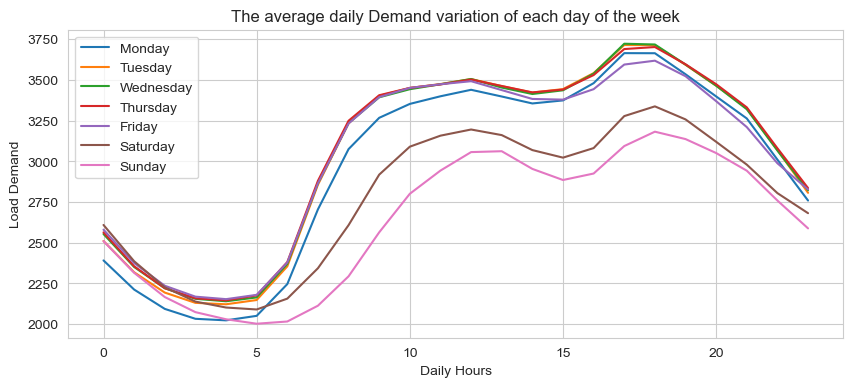

In [34]:
plt.figure(figsize=(10,4))
plt.plot(monday_demand,label='Monday');
plt.plot(tuesday_demand,label='Tuesday');
plt.plot(wednesday_demand,label='Wednesday');
plt.plot(thursday_demand,label='Thursday');
plt.plot(friday_demand,label='Friday');
plt.plot(saturday_demand,label='Saturday');
plt.plot(sunday_demand,label='Sunday');

plt.xlabel("Daily Hours")
plt.ylabel("Load Demand")
plt.title("The average daily Demand variation of each day of the week")
plt.legend()
plt.savefig("Task7B(Weekly Profile).png")

### Task 8

The question aims to determine whether there exists a significant statistical distinction between demand for a service or product during the weekend (Saturday and Sunday) compared to demand during the working week (Monday to Friday). To answer this question, We are required to conduct a statistical hypothesis test such as a t-test, to reach a conclusion based on the data.

#### I. By considering the daily average demand

In [35]:
daily_demand = daily_demand.groupby('days')['Demand'].mean().reset_index()
daily_demand = daily_demand.sort_values(by='days')
weekday_demand = daily_demand[daily_demand['days'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekend_demand = daily_demand[daily_demand['days'].isin(['Saturday', 'Sunday'])]

In [36]:
daily_demand = daily_demand.groupby('days')['Demand'].mean().reset_index()

In [37]:
weekday_demand['days'].unique()

array(['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [38]:
weekend_demand['days'].unique()

array(['Saturday', 'Sunday'], dtype=object)

In [39]:
weekend_demand.head()

,days,Demand
2,Saturday,2783.925681
3,Sunday,2644.316707


In [40]:
weekday_demand.head()

,days,Demand
0,Friday,3031.418470
1,Monday,2966.307292
4,Thursday,3063.700521
5,Tuesday,3052.404647
6,Wednesday,3059.144458


In [41]:
len(daily_demand)

7

In [42]:
t_stat, p_value = ttest_ind(weekday_demand['Demand'], weekend_demand['Demand'],equal_var=True)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  6.732306617845197
P-Value:  0.0010963146723274575


#### II. By considering a given dataset as a whole

In [43]:
system_demand=system_demand.set_index("Date")
system_demand['days']=system_demand.index.day_name()

In [44]:
system_demand = system_demand.sort_values(by='days')
weekday_demand = system_demand[system_demand['days'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekend_demand = system_demand[system_demand['days'].isin(['Saturday', 'Sunday'])]

In [45]:
len(weekday_demand['Demand'])

25056

In [46]:
len(weekend_demand['Demand'])

9984

In [47]:
t_stat, p_value = ttest_ind(weekday_demand['Demand'], weekend_demand['Demand'])
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  46.54684714308396
P-Value:  0.0


### Task 9

The task requires to divide the data into two parts and reserve the second part for evaluation. After that, we need to use a basic forecasting method called "persistence" on the first part of the data, which assumes that if there is little change in the data over time, the latest observation is a good forecast for the future. The objective is to calculate the mean absolute error (MAE) and create a graph that shows how the MAE varies with forecast horizons for lead times up to one day in advance.

In [48]:
# Checking the length of my dataframe
len(system_demand_df)

35040

In [49]:
# dividing the dataframe into two halves
system_demand_df=system_demand_df.reset_index()
first_half=system_demand_df.loc[:17519]
second_half=system_demand_df.loc[17520:]
first_half=first_half.set_index("Date")
second_half=second_half.set_index("Date")

In [50]:
# Checking the length of the first half of my dataframe
len(first_half)

17520

In [51]:
# Checking the length of the second half of my dataframe
len(second_half)

17520

In [52]:
# Declaring the horizon of one day
hours=np.linspace(0,24,96)
len(hours)
n_values=[]
for numbers in range(1,97):
    n_values.append(numbers)
Demand_prediction=system_demand_df    

In [53]:
# creating a function that forecast the demand each horizon
def Prediction_calculation(Demand_prediction, n_values):
    for n in n_values:
        column_name = 'Demand Prediction_' + str(n)
        Demand_prediction[column_name] = Demand_prediction['Demand'].shift(n)
    return Demand_prediction

In [54]:
# Checking if the calculated forecast was successful
Demand_prediction=Prediction_calculation(Demand_prediction, n_values)


In [55]:
# Dividing the dataset into two halves
Demand_Prediction=Demand_prediction.reset_index()
first_half_prediction=Demand_prediction.loc[:17519]
second_half_prediction=Demand_prediction.loc[17520:]

In [56]:
# creating a function that check the number of missing data in  each column of our dataframe in percentage
def percent_missing(d):
    percent_nan = 100* d.isnull().sum() / len(d)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [57]:
# checking the number of missing data in  each column of our dataframe in percentage
percent_nan = percent_missing(second_half_prediction)
percent_nan

Series([], dtype: float64)

In [58]:
first_half.isnull().sum()

index     0
Demand    0
dtype: int64

In [59]:
print('The length of the actual value is',len(first_half))
print('The length of the predicted value is',len(second_half_prediction))

The length of the actual value is 17520
The length of the predicted value is 17520


#### ii. Dealing with the missing values 

In [60]:
# Declaration of a function that calculate the mean absolute error
demand_prediction=second_half_prediction
def MAE_calculation(demand_prediction, n_values):
    MAE=[]
    i = 0
    while i < len(n_values):
        n = n_values[i]
        column_name = 'Demand Prediction_' + str(n)
        errors=mae(second_half['Demand'],second_half_prediction[column_name])
        MAE.append(errors)
        i += 1
    return MAE

In [61]:
mae= MAE_calculation(demand_prediction, n_values)

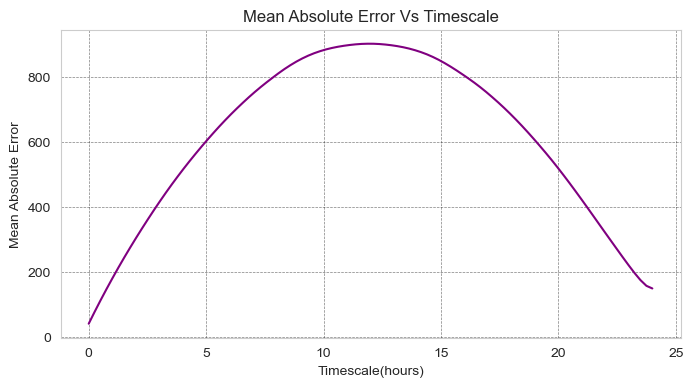

In [62]:
# Plotting the mean absolute error versur the time horizon
plt.figure(figsize=(8,4))
plt.plot(hours,mae,color='purple');
plt.xlabel('Timescale(hours)');
plt.ylabel('Mean Absolute Error');
plt.title('Mean Absolute Error Vs Timescale');
plt.grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5);
plt.savefig("Task9(MAE Vs Time).png")

### Task 10

 The task at hand is to calculate the mean absolute percentage error for the persistence approach and plot it against forecast horizons up to one day ahead. Afterwards, we are expected to examine and clarify the shapes of the resulting curves that demonstrate performance against forecast horizons.

In [63]:
# The following function calculate the mean absolute percentage error
def MAPE_calculation(demand_prediction, n_values):
    APE = []
    MAPE = []
    i = 0
    while i < len(n_values):
        n = n_values[i]
        column_name = 'Demand Prediction_' + str(n)
        MAP= mape(second_half['Demand'],second_half_prediction[column_name])
        MAP=MAP*100
        MAPE.append(MAP)
        i += 1
    return APE, MAPE

In [64]:
APE, MAPE=MAPE_calculation(demand_prediction, n_values)

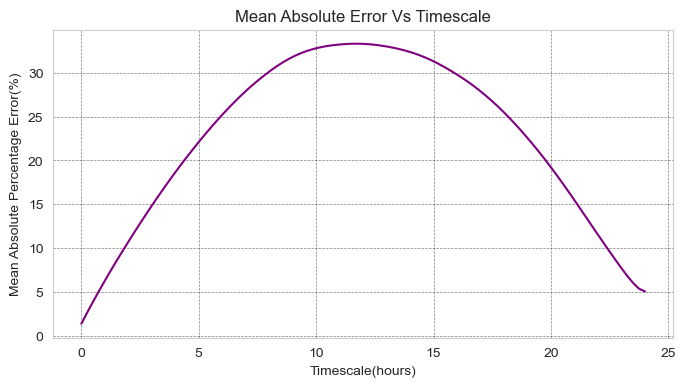

In [65]:
# Plotting the mean absolute percentage error versus the time horizon
plt.figure(figsize=(8,4))
plt.plot(hours,MAPE,color='purple');
plt.xlabel('Timescale(hours)');
plt.ylabel('Mean Absolute Percentage Error(%)');
plt.title('Mean Absolute Error Vs Timescale');
plt.grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5);
plt.savefig("Task10(MAPE Vs Time).png")